In [ ]:
# Step1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                   

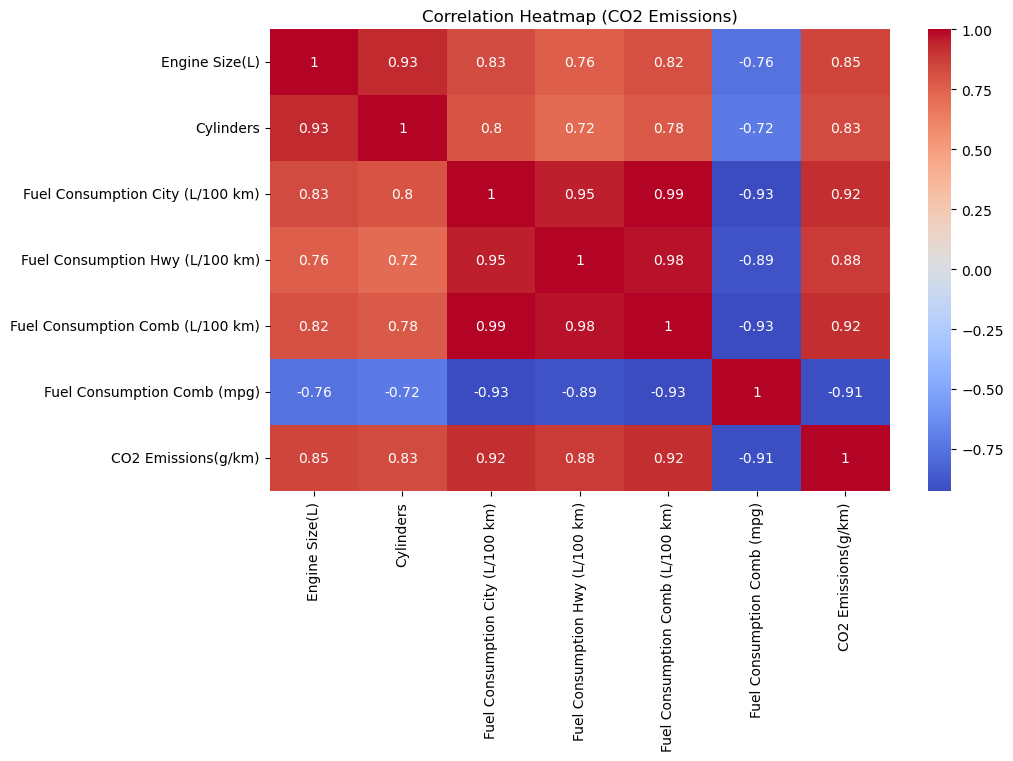

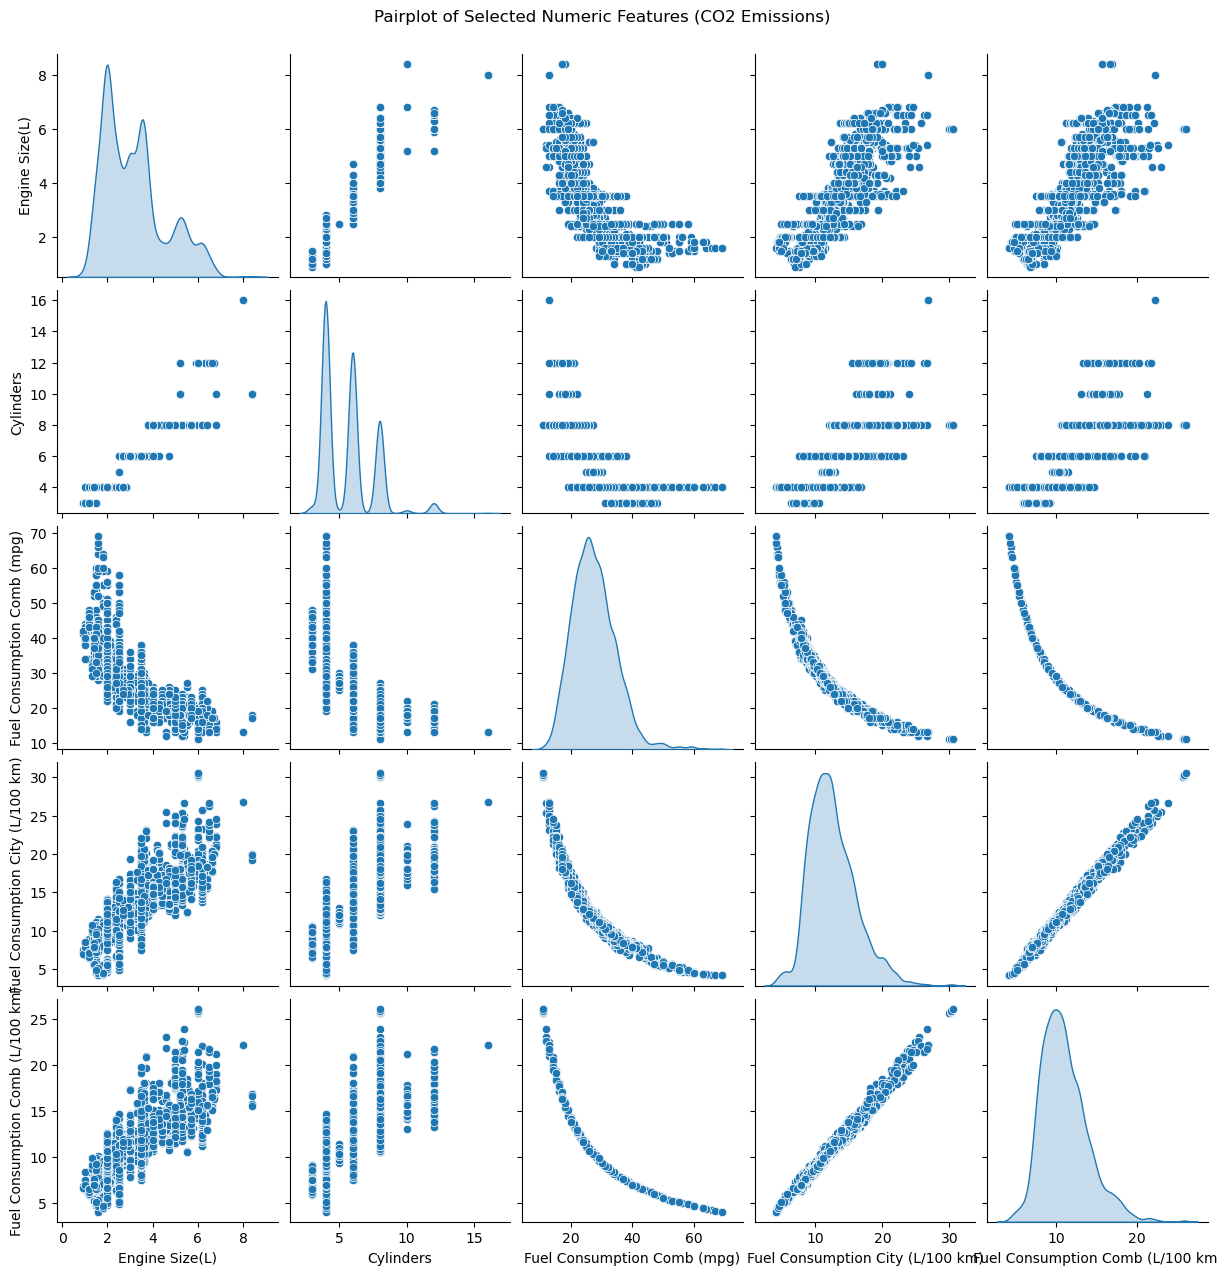

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')
Mean Absolute Error: 13.50933636464962
Mean Squared Error: 443.2432335455481
R-Squared Score:0.8711362656104268


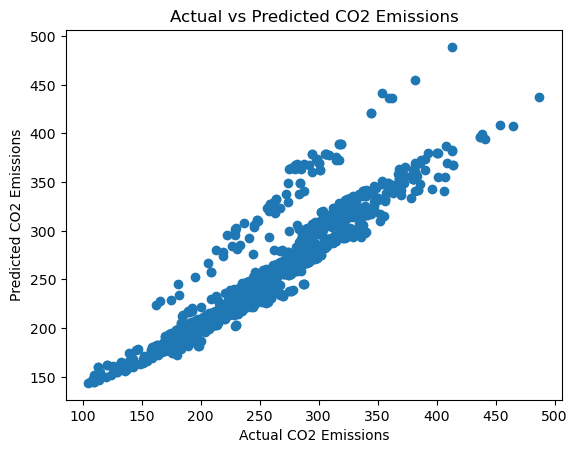

In [ ]:
#step 2: Load Dataset
df_co2 = pd.read_csv("CO2 Emissions.csv") #update with correct file path
print(df_co2.head())
print(df_co2.info())
print(df_co2.describe())
print(df_co2.isnull().sum()) #Check for missing values

# Step 4: Exploratory Data Analysis(EDA)
plt.figure(figsize=(10,6))
sns.heatmap(df_co2.select_dtypes(include=['number']).corr(), annot= True, cmap = 'coolwarm')
plt.title("Correlation Heatmap (CO2 Emissions)")
plt.show()

# Selecting only a subset of numerical columns for pairplot to avoid overcrowding
numeric_cols_subset = df_co2.select_dtypes(include=['number']).sample(n=5, axis=1, random_state=42) # Adjust number of columns if needed
sns.pairplot(numeric_cols_subset, diag_kind='kde')
plt.suptitle("Pairplot of Selected Numeric Features (CO2 Emissions)", y=1.02)
plt.show()

print(df_co2.columns)

#step 5: Data Preprocessing
#selecting features and target variable
X = df_co2[['Engine Size(L)','Fuel Consumption Comb (L/100 km)' ]]
y = df_co2['CO2 Emissions(g/km)']

#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

#Step 6: Model Training
model = LinearRegression()
model.fit(X_train, y_train)

#Step 7: Model Prediction
y_pred = model.predict(X_test)

#step 8 : model evaluation
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score:{r2}")

#Step 9 : Visualization of Predictions
plt.scatter(y_test,y_pred)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.show()